<a href="https://colab.research.google.com/github/souradipta93/AI-applications/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_edited.csv to churn_edited.csv


In [ ]:
import pandas as pd
import io 
churn = pd.read_csv(io.BytesIO(uploaded['churn_edited.csv'])) 

In [ ]:
churn.head() # to look at the top rows for each column

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,AL,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


In [ ]:
churn.describe() # creates a tables showing the key statistics for each feature

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,101.727179,0.118462,0.261538,7.662051,182.093692,100.375897,30.956446,202.449128,100.228718,17.208369,201.606308,100.074872,9.072431,10.324974,4.473333,2.788251,1.651795,0.247692
std,39.595938,0.323237,0.439585,13.471790,56.811008,20.568791,9.657890,50.795617,19.803084,4.317592,49.669060,19.605801,2.235183,2.796908,2.433109,0.755104,1.399730,0.431783
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.400000,33.000000,2.130000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,0.000000,0.000000,0.000000,143.725000,87.000000,24.435000,167.525000,87.000000,14.242500,167.225000,87.000000,7.522500,8.600000,3.000000,2.320000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.900000,101.000000,30.580000,202.850000,100.000000,17.245000,201.500000,100.000000,9.065000,10.400000,4.000000,2.810000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,220.775000,114.750000,37.535000,237.075000,114.000000,20.150000,235.300000,113.000000,10.590000,12.200000,6.000000,3.290000,2.000000,0.000000
max,232.000000,1.000000,1.000000,50.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


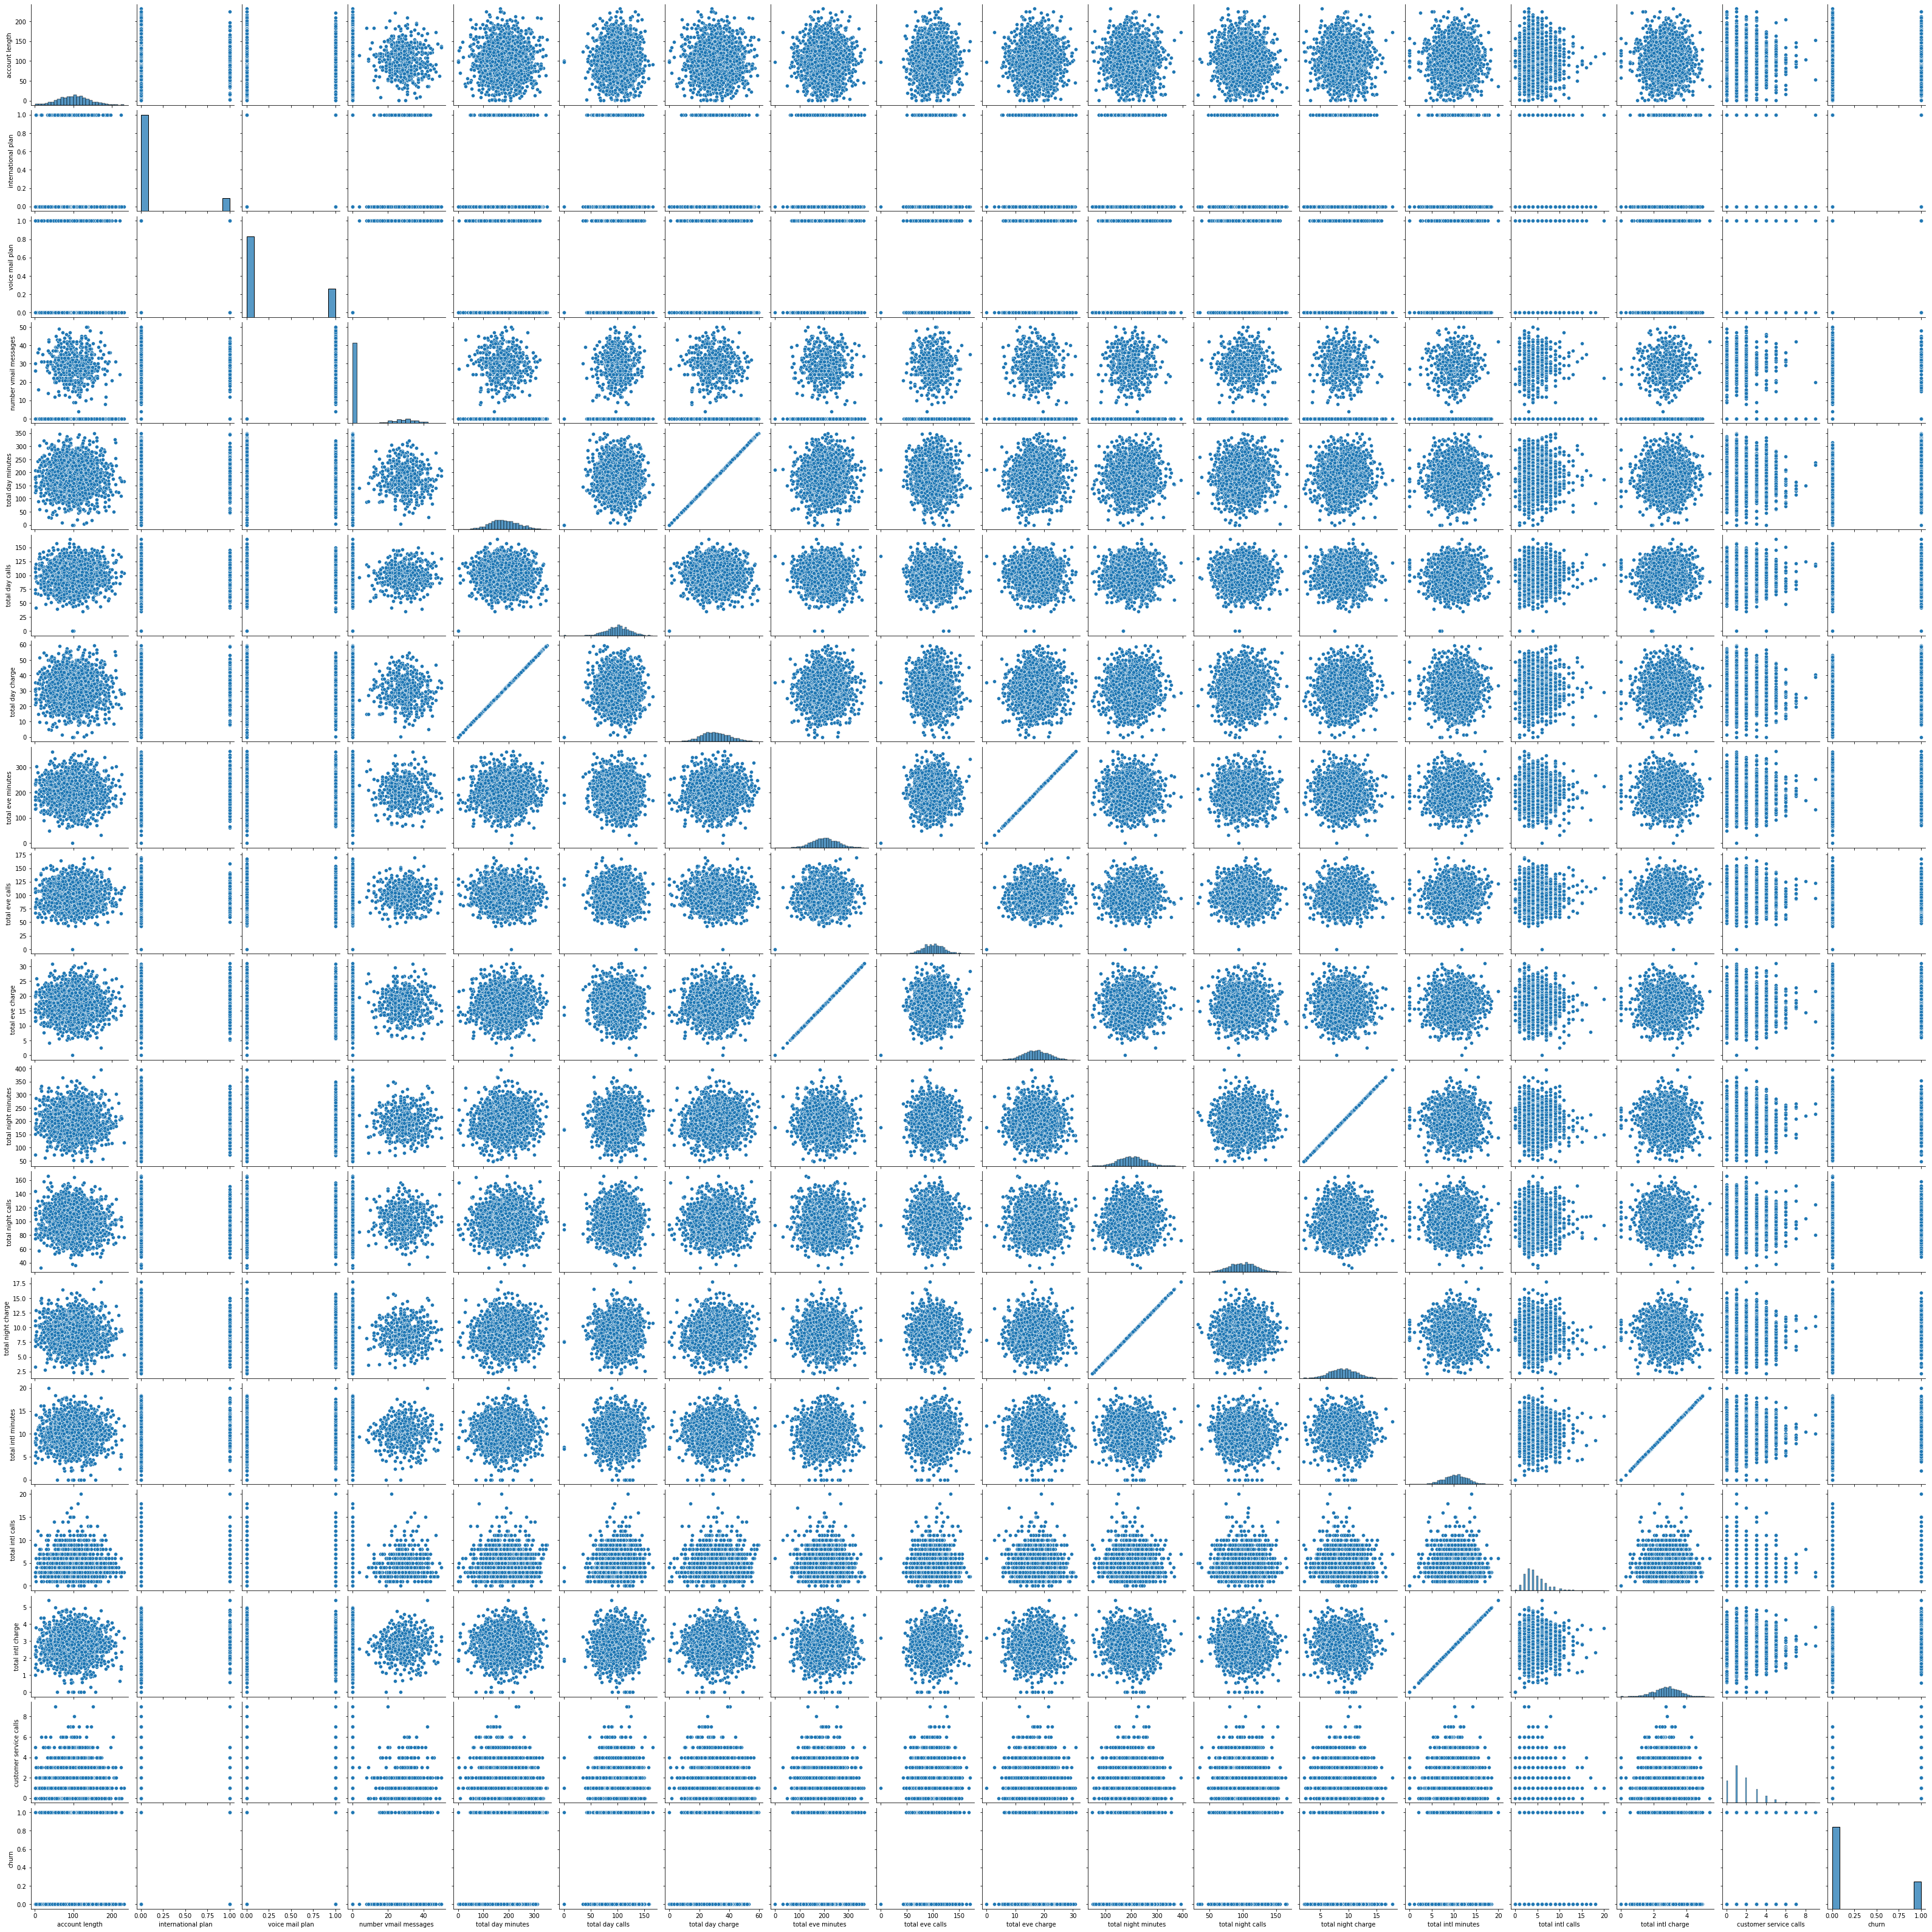

In [ ]:
import seaborn as sns
sns.pairplot(churn)

In [ ]:
churn_features = churn.iloc[:, 1:17].values # creates an array of features for all columns except churn 
churn_labels = churn.iloc[:,18].values # creates an array for the churn variable (our output)

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(churn_features, churn_labels, test_size = 0.4, random_state = 21)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
rfc_object = rfc(n_estimators=10)
rfc_object.fit(train_features, train_labels)  # fitting a random forest model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predicted_labels = rfc_object.predict(test_features) #applying models to test data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print("Accuracy:", accuracy_score(test_labels, predicted_labels)) 

Accuracy: 0.8589743589743589


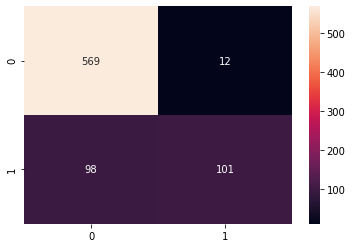

In [ ]:
rf_conf_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
sns.heatmap(rf_conf_matrix, annot=True,  fmt='');

In [ ]:
perceptron = Perceptron()
perceptron.fit(train_features, train_labels) # fitting a simple perceptron model

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predicted_labels = perceptron.predict(test_features) 

In [ ]:
print("Accuracy:", accuracy_score(test_labels, predicted_labels))

Accuracy: 0.7461538461538462


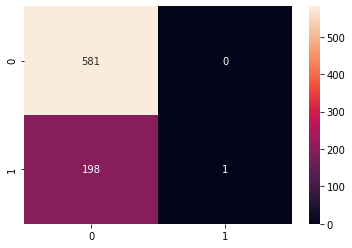

In [ ]:
perc_conf_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
sns.heatmap(perc_conf_matrix, annot=True,  fmt='');

In [ ]:
knc = KNeighborsClassifier(n_neighbors=12, p = 2, metric="euclidean")
knc.fit(train_features, train_labels) # fitting a k-nearest neighbor model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
predicted_labels = knc.predict(test_features) 

In [ ]:
print("Accuracy:", accuracy_score(test_labels, predicted_labels))

Accuracy: 0.8051282051282052


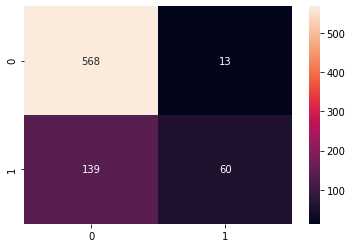

In [ ]:
knc_conf_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
sns.heatmap(knc_conf_matrix, annot=True,  fmt='');

In [ ]:
import pandas as pd
cities = pd.DataFrame(predicted_labels)
cities.to_csv('cities.csv')

In [ ]:
from google.colab import files
cities.to_csv('cities.csv') 
files.download('cities.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>